In [3]:
# get the permit data from the API
import json
import requests
import pandas as pd
import geopandas as gpd
from bs4 import BeautifulSoup

In [17]:
# Charger Point
# May use webscraping
url = 'https://driver.chargepoint.com/mapCenter/39.32392756440551/-113.45089413534384/5?view=list'
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

soup

<!DOCTYPE html>
<html lang="en"><head><title>ChargePoint Driver Portal</title><meta charset="utf-8"/><script src="/cdn-cgi/apps/head/y7GTe3hWBTXk1g0I6BovNRRhjko.js"></script><link href="/chargepoint.ico" rel="icon"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-control"/><meta content="Drivers can find and connect to available stations, join a Waitlist, and manage their account on the web" name="description"><meta content="685101778352519" property="fb:app_id"/><meta content="ChargePoint Driver Portal" property="og:site_name"/><meta content="website" property="og:type"/><meta content="https://driver.chargepoint.com" property="og:url"/><meta content="ChargePoint Driver Portal" property="og:title"/><meta content="https://www.chargepoint.com/img/fbshare.jpg" property="og:image"/><meta content="summary_large_image" name="twitter:card"/><meta content="@Char

In [31]:
# print(d['features'][0]['geometry']['coordinates'])

# https://api.tomtom.com/search/2/chargingAvailability.json?key={Your_API_Key}&chargingAvailability=00112233-4455-6677-8899-aabbccddeeff&connectorSet=IEC62196Type2CableAttached&minPowerKW=22.2&maxPowerKW=43.2
# Link: https://developer.tomtom.com/ev-charging-stations-availability-api/api-explorer
# API Explorer: https://developer.tomtom.com/search-api/api-explorer    

SyntaxError: unexpected EOF while parsing (1702114695.py, line 16)

In [19]:
# TomTom nearby search #radius=10000 #limit=100
Tom_APIkey ='1AZjMiiGT1jYiGLOGBO6fQ0zb02w4Qb1' 
requestString = 'https://api.tomtom.com/search/2/nearbySearch/.json?lat=34.080409&lon=-118.334206&limit=100&radius=10000&minPowerKW=0.0001&fuelSet=&view=Unified&key='+Tom_APIkey
r = requests.get(requestString)
d = json.loads(r.text)
d['results'][0]


{'type': 'POI',
 'id': '2xe1gvAAubW0buiolU2HdA',
 'score': 109.219120867,
 'dist': 709.89068,
 'info': 'search:ev:840069021383202',
 'poi': {'name': 'SemaConnect',
  'phone': '+1 800-663-5633',
  'categorySet': [{'id': 7309}],
  'url': 'semaconnect.com/',
  'categories': ['electric vehicle station'],
  'classifications': [{'code': 'ELECTRIC_VEHICLE_STATION',
    'names': [{'nameLocale': 'en-US', 'name': 'electric vehicle station'}]}]},
 'address': {'streetNumber': '301',
  'streetName': 'N Rossmore Ave',
  'municipalitySubdivision': 'Mid-Wilshire',
  'municipality': 'Los Angeles',
  'countrySecondarySubdivision': 'Los Angeles',
  'countrySubdivision': 'CA',
  'countrySubdivisionName': 'California',
  'postalCode': '90004',
  'extendedPostalCode': '90004-2404',
  'countryCode': 'US',
  'country': 'United States',
  'countryCodeISO3': 'USA',
  'freeformAddress': '301 N Rossmore Ave, Los Angeles, CA 90004',
  'localName': 'Los Angeles'},
 'position': {'lat': 34.077088, 'lon': -118.327623}

In [22]:
id_score_list = [{'ID': d['results'][i]['id'], 
                  'Score': d['results'][i]['score'],
                  'Dist': d['results'][i]['dist'],
                  'Brand': d['results'][i]['poi']['name'],
                  'Contact': d['results'][i]['poi']['phone'],
                  'Website': d['results'][i]['poi'].get('url', None),
                  'Address': d['results'][i]['address']['freeformAddress'],
                  'Zip': d['results'][i]['address']['postalCode'],
                  'City': d['results'][i]['address']['municipality'],
                  'County': d['results'][i]['address']['countrySecondarySubdivision'],
                  'State': d['results'][i]['address']['countrySubdivision'],
                  'Lon': d['results'][i]['position']['lon'],
                  'Lat': d['results'][i]['position']['lat'],
                  'Connector': d['results'][i]['chargingPark']['connectors'][0]['connectorType']}
                  for i in range(10)]

df = pd.DataFrame(id_score_list)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
gdf.head(3)
# It can only shows ten results even I set the limit at 100 

,ID,Score,Dist,Brand,Contact,Website,Address,Zip,City,County,State,Lon,Lat,Connector,geometry
0,2xe1gvAAubW0buiolU2HdA,109.219121,709.890680,SemaConnect,+1 800-663-5633,semaconnect.com/,"301 N Rossmore Ave, Los Angeles, CA 90004",90004,Los Angeles,Los Angeles,CA,-118.327623,34.077088,IEC62196Type1,POINT (-118.32762 34.07709)
1,8WtRjcSeY40KDNIwH48o4A,109.215940,712.780618,Electrify America,+1 833-632-2778,None,"Los Angeles, CA 90038",90038,Los Angeles,Los Angeles,CA,-118.327478,34.083577,Chademo,POINT (-118.32748 34.08358)
2,3lj0VHJ5MDG1X1yZQ6svQg,109.097491,820.463872,Tesla,+1 877-798-3752,www.tesla.com/destination-charging,"846 N Cahuenga Blvd, Los Angeles, CA 90038",90038,Los Angeles,Los Angeles,CA,-118.328599,34.086143,Tesla,POINT (-118.32860 34.08614)


In [27]:
# TomTom nearby search #radius=50000 #limit=100
requestString = 'https://api.tomtom.com/search/2/nearbySearch/.json?lat=34.04997177473893&lon=-118.36254643353672&limit=100&radius=50000&minPowerKW=0.0001&view=Unified&key='+Tom_APIkey
r = requests.get(requestString)
d = json.loads(r.text)

Tom_APIkey ='1AZjMiiGT1jYiGLOGBO6fQ0zb02w4Qb1' 
requestString = 'https://api.tomtom.com/search/2/nearbySearch/.json?lat=34.04997177473893&lon=-118.36254643353672&limit=1000&radius=50000&minPowerKW=0.0001&view=Unified&key='+Tom_APIkey
r = requests.get(requestString)
d = json.loads(r.text)
d['summary']

{'queryType': 'NEARBY',
 'queryTime': 30,
 'numResults': 96,
 'offset': 0,
 'totalResults': 96,
 'fuzzyLevel': 1,
 'geoBias': {'lat': 34.04997177473893, 'lon': -118.36254643353672}}

In [36]:
id_score_list = [{'ID': d['results'][i]['id'], 
                  'Score': d['results'][i]['score'],
                  'Dist': d['results'][i]['dist'],
                  'Brand': d['results'][i]['poi']['name'],
                  'Contact': d['results'][i]['poi'].get('phone', None),
                  'Website': d['results'][i]['poi'].get('url', None),
                  'Address': d['results'][i]['address']['freeformAddress'],
                  'Zip': d['results'][i]['address']['postalCode'],
                  'City': d['results'][i]['address']['municipality'],
                  'County': d['results'][i]['address']['countrySecondarySubdivision'],
                  'State': d['results'][i]['address']['countrySubdivision'],
                  'Lon': d['results'][i]['position']['lon'],
                  'Lat': d['results'][i]['position']['lat'],
                  'Connector': d['results'][i]['chargingPark']['connectors'][0]['connectorType']}
                  for i in range(96)]

df = pd.DataFrame(id_score_list)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
gdf.head(2)

,ID,Score,Dist,Brand,Contact,Website,Address,Zip,City,County,State,Lon,Lat,Connector,geometry
0,LR5dMrlxlKjkuolnAIjIBQ,109.902760,88.397927,Shell Recharge,+1 855-900-7584,shellrecharge.com/,"5712 W Pico Blvd, Los Angeles, CA 90019",90019,Los Angeles,Los Angeles,CA,-118.362987,34.050678,IEC62196Type1,POINT (-118.36299 34.05068)
1,4TLc4xpP4Atj-Or9jLxgeQ,109.645326,322.437019,FLO,+1 888-356-8911,www.flo.com/,"1398 S Orange Grove Ave, Los Angeles, CA 90019",90019,Los Angeles,Los Angeles,CA,-118.365537,34.051478,IEC62196Type1,POINT (-118.36554 34.05148)


In [37]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         96 non-null     object  
 1   Score      96 non-null     float64 
 2   Dist       96 non-null     float64 
 3   Brand      96 non-null     object  
 4   Contact    92 non-null     object  
 5   Website    88 non-null     object  
 6   Address    96 non-null     object  
 7   Zip        96 non-null     object  
 8   City       96 non-null     object  
 9   County     96 non-null     object  
 10  State      96 non-null     object  
 11  Lon        96 non-null     float64 
 12  Lat        96 non-null     float64 
 13  Connector  96 non-null     object  
 14  geometry   96 non-null     geometry
dtypes: float64(4), geometry(1), object(10)
memory usage: 11.4+ KB


In [39]:
# TomTom nearby search #radius=50000 #limit=500
Tom_APIkey ='1AZjMiiGT1jYiGLOGBO6fQ0zb02w4Qb1' 
requestString = 'https://api.tomtom.com/search/2/nearbySearch/.json?lat=34.04997177473893&lon=-118.36254643353672&limit=500&radius=50000&minPowerKW=0.0001&view=Unified&key='+Tom_APIkey
r = requests.get(requestString)
d = json.loads(r.text)
d['summary']
# Get the same result

{'queryType': 'NEARBY',
 'queryTime': 32,
 'numResults': 96,
 'offset': 0,
 'totalResults': 96,
 'fuzzyLevel': 1,
 'geoBias': {'lat': 34.04997177473893, 'lon': -118.36254643353672}}

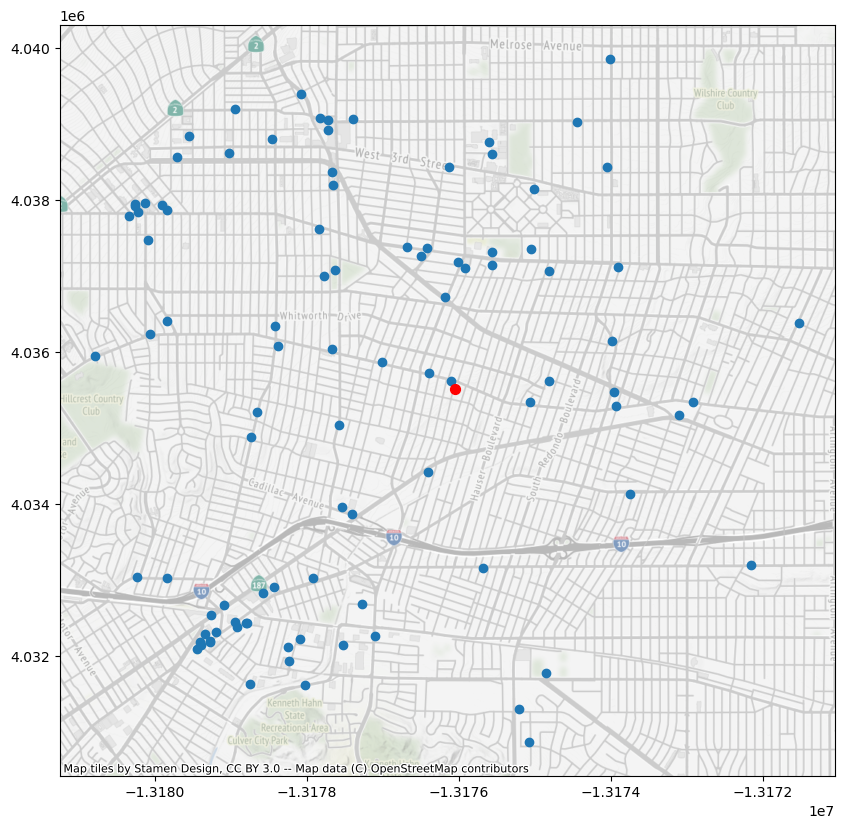

In [51]:
# Plot the result
import contextily as ctx
import matplotlib.pyplot as plt

# Define CRS for the GeoDataFrame
gdf = gdf.set_crs(epsg=4326)

fig, ax = plt.subplots(figsize=(10,10))
gdf.to_crs('EPSG:3857').plot(ax=ax, legend=True) # Reproject the GeoDataFrame to match the basemap

# Add a red point at the specified coordinates
import pyproj

# Define the input and output coordinate reference systems
in_proj = pyproj.CRS('EPSG:4326')
out_proj = pyproj.CRS('EPSG:3857')

# Define the point in longitude and latitude
lon = -118.36254643353672
lat = 34.04997177473893

# Convert the point to EPSG 3857
transformer = pyproj.Transformer.from_crs(in_proj, out_proj, always_xy=True)
x, y = transformer.transform(lon, lat)

# Add a red point at the specified coordinates
ax.scatter(x=x, y=y, s=50, c='r', marker='o')

ctx.add_basemap(ax=ax, alpha=0.5) # 50% opacity

In [37]:
# TomTom geometry search

Tom_APIkey ='1AZjMiiGT1jYiGLOGBO6fQ0zb02w4Qb1' 
requestString = 'https://api.tomtom.com/search/2/geometrySearch/electric%20vehicle%20station.json?limit=2&minPowerKW=0.0001&key='+Tom_APIkey
r = requests.get(requestString)
d = json.loads(r.text)
d
# Can't get anything

{'errorText': 'Missing or invalid geometryList parameter',
 'detailedError': {'code': 'BadRequest',
  'message': 'Missing or invalid geometryList parameter'},
 'httpStatusCode': 400}

### Not needed

In [52]:

import geopandas as gpd

# Read GeoJSON file
gdf = gpd.read_file('Data/City_Boundaries.geojson')

# City = Los Angeles
gdf_LA = gdf[gdf['CITY_NAME'] == 'Los Angeles']
gdf_LA.head(2)

import json
from shapely.geometry import mapping

# Define a function to convert the polygon to a list of vertices
def polygon_to_vertices(polygon):
    polygon_dict = mapping(polygon)
    polygon_type = polygon_dict['type']
    polygon_coords = polygon_dict['coordinates'][0]
    vertices = [{'lat': coord[1], 'lon': coord[0]} for coord in polygon_coords]
    return {'type': polygon_type, 'vertices': vertices}

# Convert the "geometry" column to a list of vertices
vertices = gdf_LA["geometry"].apply(polygon_to_vertices).tolist()

# Convert the list of vertices to a JSON string
#json_string = json.dumps(vertices)

In [11]:
# HERE EV
HereEVAPIkey ='' 
requestString = 'https://ev-v2.cc.api.here.com/ev/stations.json?prox=52.516667,13.383333,5000&connectortype=31&apiKey={YOUR_API_KEY}'
r = requests.get(requestString)
d = json.loads(r.text)
d

{'error': 'Unauthorized', 'error_description': 'Illegal API key id'}

In [13]:
# NREL
NREL_API = 'ooJybV3rIs1qguZdrSsghfSZJREZL15NW7NHNhW9'
requestString = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.geojson?api_key=ooJybV3rIs1qguZdrSsghfSZJREZL15NW7NHNhW9&fuel_type=ELEC&state=CA&limit=1'
r = requests.get(requestString)
print(r.text)
d = json.loads(r.text)
d
# hesitancy = pd.DataFrame(json.loads(r.text))

{"type":"FeatureCollection","metadata":{"station_locator_url":"https://afdc.energy.gov/stations/","total_results":16169,"station_counts":{"total":46308,"fuels":{"BD":{"total":0},"E85":{"total":0},"ELEC":{"total":46308,"stations":{"total":16169}},"HY":{"total":0},"LNG":{"total":0},"CNG":{"total":0},"LPG":{"total":0},"RD":{"total":0}}}},"features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-118.3879713743439,34.2483191527193]},"properties":{"access_code":"private","access_days_time":"Fleet use only","access_detail_code":null,"cards_accepted":null,"date_last_confirmed":"2023-01-10","expected_date":null,"fuel_type_code":"ELEC","groups_with_access_code":"Private","id":1517,"open_date":"1999-10-15","owner_type_code":"LG","status_code":"E","restricted_access":null,"station_name":"LADWP - Truesdale Center","station_phone":null,"updated_at":"2023-02-15T22:45:41Z","facility_type":"UTILITY","geocode_status":"GPS","city":"Sun Valley","intersection_directions":null,"plus4":null,"s

{'type': 'FeatureCollection',
 'metadata': {'station_locator_url': 'https://afdc.energy.gov/stations/',
  'total_results': 16169,
  'station_counts': {'total': 46308,
   'fuels': {'BD': {'total': 0},
    'E85': {'total': 0},
    'ELEC': {'total': 46308, 'stations': {'total': 16169}},
    'HY': {'total': 0},
    'LNG': {'total': 0},
    'CNG': {'total': 0},
    'LPG': {'total': 0},
    'RD': {'total': 0}}}},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [-118.3879713743439, 34.2483191527193]},
   'properties': {'access_code': 'private',
    'access_days_time': 'Fleet use only',
    'access_detail_code': None,
    'cards_accepted': None,
    'date_last_confirmed': '2023-01-10',
    'expected_date': None,
    'fuel_type_code': 'ELEC',
    'groups_with_access_code': 'Private',
    'id': 1517,
    'open_date': '1999-10-15',
    'owner_type_code': 'LG',
    'status_code': 'E',
    'restricted_access': None,
    'station_name': 'LADWP - Truesdale Center

In [14]:
print(d.keys())
# print(d['type'])
# print(d['metadata'])
print(d['features'][0])

dict_keys(['type', 'metadata', 'features'])
{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-118.3879713743439, 34.2483191527193]}, 'properties': {'access_code': 'private', 'access_days_time': 'Fleet use only', 'access_detail_code': None, 'cards_accepted': None, 'date_last_confirmed': '2023-01-10', 'expected_date': None, 'fuel_type_code': 'ELEC', 'groups_with_access_code': 'Private', 'id': 1517, 'open_date': '1999-10-15', 'owner_type_code': 'LG', 'status_code': 'E', 'restricted_access': None, 'station_name': 'LADWP - Truesdale Center', 'station_phone': None, 'updated_at': '2023-02-15T22:45:41Z', 'facility_type': 'UTILITY', 'geocode_status': 'GPS', 'city': 'Sun Valley', 'intersection_directions': None, 'plus4': None, 'state': 'CA', 'street_address': '11797 Truesdale St', 'zip': '91352', 'country': 'US', 'bd_blends': None, 'cng_dispenser_num': None, 'cng_fill_type_code': None, 'cng_psi': None, 'cng_renewable_source': None, 'cng_total_compression': None, 'cng_total_stora

In [30]:
print(d['features'][0]['geometry']['coordinates'])
print(d['features'][0]['properties'])

[-118.3879713743439, 34.2483191527193]
{'access_code': 'private', 'access_days_time': 'Fleet use only', 'access_detail_code': None, 'cards_accepted': None, 'date_last_confirmed': '2023-01-10', 'expected_date': None, 'fuel_type_code': 'ELEC', 'groups_with_access_code': 'Private', 'id': 1517, 'open_date': '1999-10-15', 'owner_type_code': 'LG', 'status_code': 'E', 'restricted_access': None, 'station_name': 'LADWP - Truesdale Center', 'station_phone': None, 'updated_at': '2023-02-15T22:45:41Z', 'facility_type': 'UTILITY', 'geocode_status': 'GPS', 'city': 'Sun Valley', 'intersection_directions': None, 'plus4': None, 'state': 'CA', 'street_address': '11797 Truesdale St', 'zip': '91352', 'country': 'US', 'bd_blends': None, 'cng_dispenser_num': None, 'cng_fill_type_code': None, 'cng_psi': None, 'cng_renewable_source': None, 'cng_total_compression': None, 'cng_total_storage': None, 'cng_vehicle_class': None, 'cng_has_rng': None, 'e85_blender_pump': None, 'e85_other_ethanol_blends': None, 'ev_co

In [ ]:
hesitancy = pd.DataFrame(json.loads(r.text))

In [36]:
df2 = pd.DataFrame(d['features'][0]['properties'])
df2

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,owner_type_code,status_code,restricted_access,station_name,station_phone,updated_at,facility_type,geocode_status,city,intersection_directions,plus4,state,street_address,zip,country,bd_blends,cng_dispenser_num,cng_fill_type_code,cng_psi,cng_renewable_source,cng_total_compression,cng_total_storage,cng_vehicle_class,cng_has_rng,e85_blender_pump,e85_other_ethanol_blends,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,hy_is_retail,hy_pressures,hy_standards,hy_status_link,lng_renewable_source,lng_vehicle_class,lng_has_rng,lpg_primary,lpg_nozzle_types,ng_fill_type_code,ng_psi,ng_vehicle_class,rd_blends,rd_blends_fr,rd_blended_with_biodiesel,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr
0,private,Fleet use only,None,None,2023-01-10,None,ELEC,Private,1517,1999-10-15,LG,E,None,LADWP - Truesdale Center,None,2023-02-15T22:45:41Z,UTILITY,GPS,Sun Valley,None,None,CA,11797 Truesdale St,91352,US,None,None,None,None,None,None,None,None,None,None,None,CHADEMO,3,None,39,Non-Networked,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Privé,None
1,private,Fleet use only,None,None,2023-01-10,None,ELEC,Private,1517,1999-10-15,LG,E,None,LADWP - Truesdale Center,None,2023-02-15T22:45:41Z,UTILITY,GPS,Sun Valley,None,None,CA,11797 Truesdale St,91352,US,None,None,None,None,None,None,None,None,None,None,None,J1772,3,None,39,Non-Networked,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Privé,None
2,private,Fleet use only,None,None,2023-01-10,None,ELEC,Private,1517,1999-10-15,LG,E,None,LADWP - Truesdale Center,None,2023-02-15T22:45:41Z,UTILITY,GPS,Sun Valley,None,None,CA,11797 Truesdale St,91352,US,None,None,None,None,None,None,None,None,None,None,None,J1772COMBO,3,None,39,Non-Networked,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Privé,None
